In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt 
from sklearn.neighbors import KNeighborsRegressor


In [2]:
df = pd.read_csv("cleaned-pp.csv", header=0)
df = df.drop_duplicates()
df = df.dropna()
df.tail()

util_df = df[['abv','target_fg','target_og','ebc','srm','ph','ibu']]

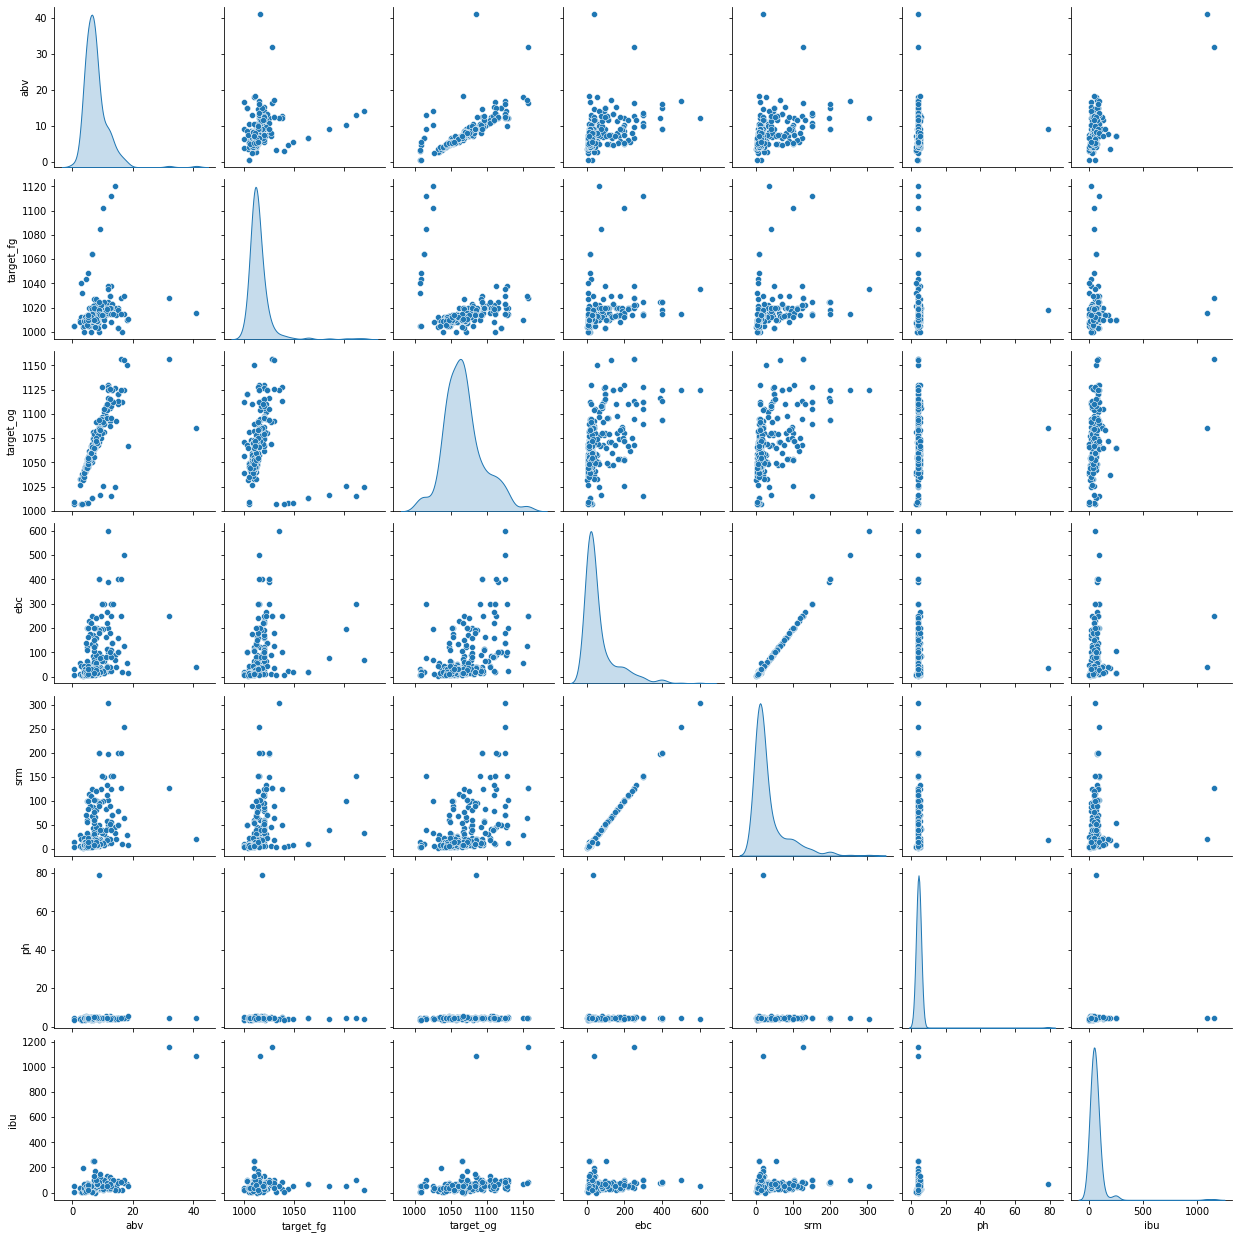

In [3]:
sns.pairplot(util_df, diag_kind="kde")

In [4]:
util_df.max()


abv            41.0
target_fg    1120.0
target_og    1157.0
ebc           600.0
srm           305.0
ph             79.0
ibu          1157.0
dtype: float64

In [5]:
df_remove = util_df.loc[(util_df['ph'] > 14) | (util_df['ibu'] > 100) | (util_df['abv'] > 20 )]
util_df = util_df.drop(df_remove.index)
util_df.max()

abv            18.3
target_fg    1120.0
target_og    1157.0
ebc           600.0
srm           305.0
ph              5.6
ibu           100.0
dtype: float64

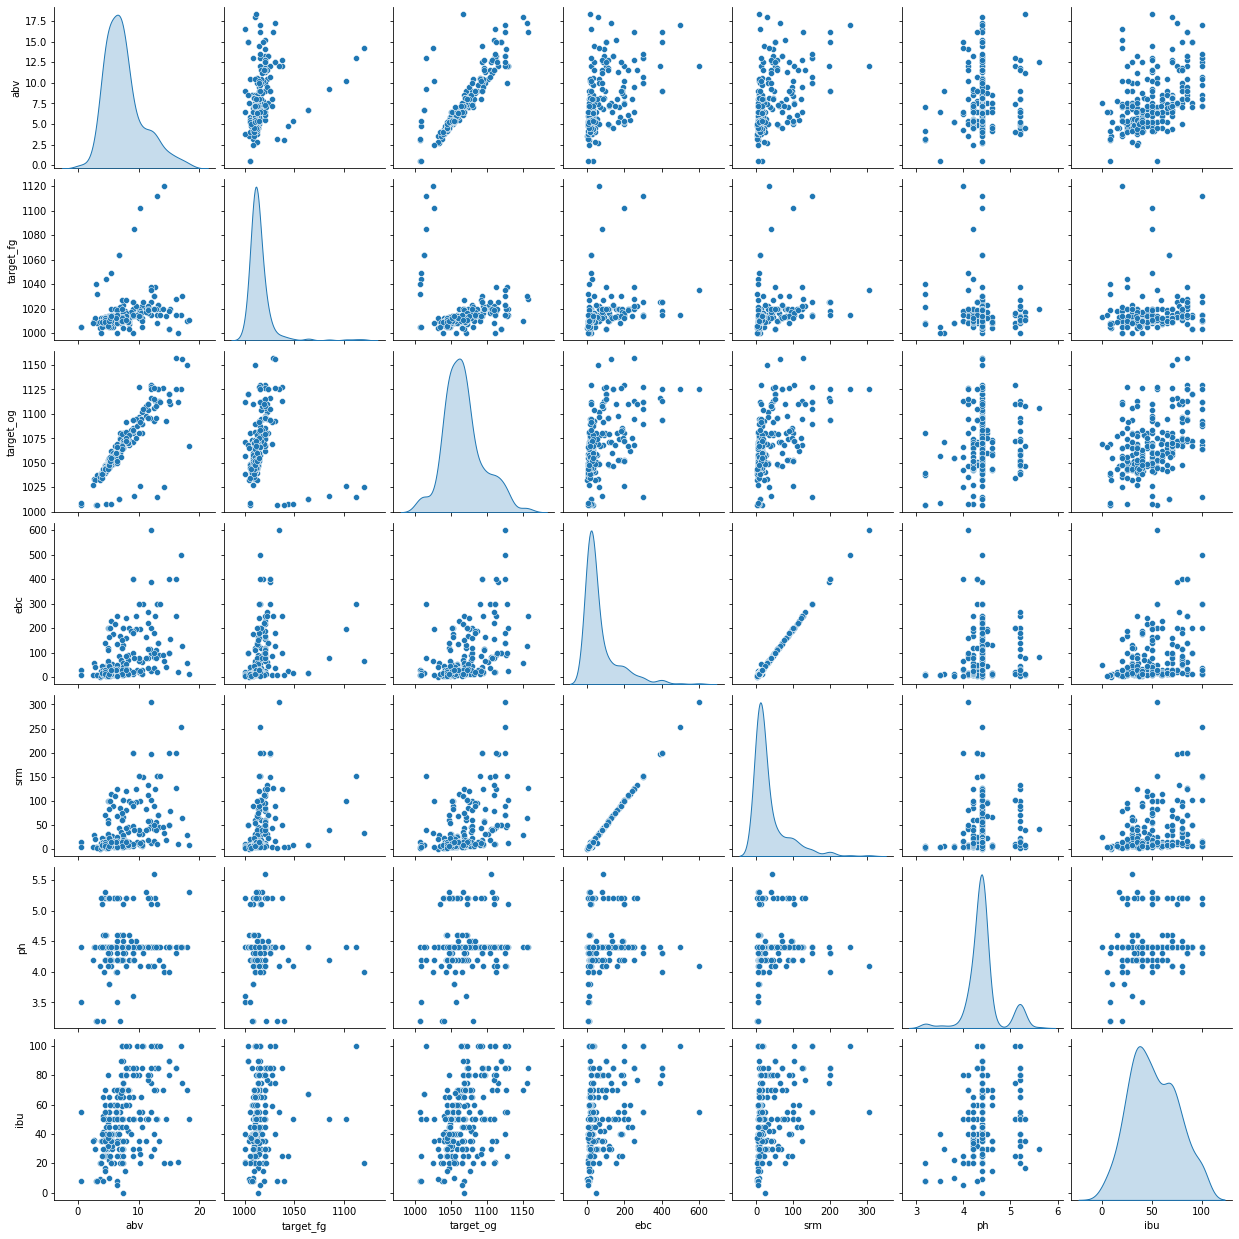

In [6]:
sns.pairplot(util_df, diag_kind="kde")

In [7]:
train_stats = util_df.describe()
train_stats.pop("ibu")
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
abv,269.0,7.549442,3.210931,0.5,5.2,7.0,8.8,18.3
target_fg,269.0,1014.977695,13.771302,1000.0,1010.0,1012.0,1015.0,1120.0
target_og,269.0,1067.323048,27.453510,1007.0,1048.0,1065.0,1079.0,1157.0
ebc,269.0,68.655762,94.046053,2.0,15.0,28.0,80.0,600.0
srm,269.0,34.511784,47.423942,1.0,8.0,14.2,41.0,305.0
ph,269.0,4.417844,0.356571,3.2,4.3,4.4,4.4,5.6


In [8]:
train_dataset = util_df.sample(frac=0.85,random_state=0)
test_dataset = util_df.drop(train_dataset.index)

ytrain = train_dataset.pop('ibu')
ytest = test_dataset.pop('ibu')

In [9]:
def norm(x):
  return (x - train_stats['mean']) / train_stats['std']
xtrain = norm(train_dataset)
xtest = norm(test_dataset)


In [10]:
def plot_result(ypred,ytest):
  x_ax = range(len(ytest))
  plt.plot(x_ax, ytest, label="original")
  plt.plot(x_ax, ypred, label="predicted")
  plt.title("predicted ibu test")
  plt.legend()
  plt.show()

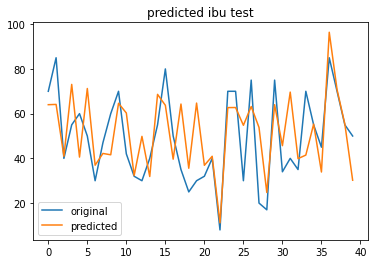

Erro Médio Absoluto: 12.86


In [11]:
xgbr = xgb.XGBRegressor(objective='reg:squarederror')
xgbr.fit(xtrain, ytrain)
ypred = xgbr.predict(xtest)

plot_result(ypred,ytest)
print("Erro Médio Absoluto: {:.2f}".format(mean_absolute_error(ypred, ytest)))

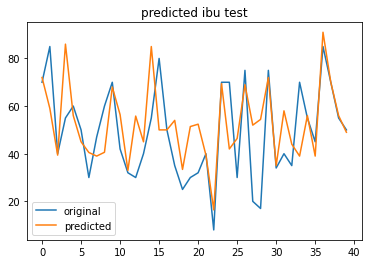

Erro Médio Absoluto: 12.26


In [12]:
regr = KNeighborsRegressor()
regr.fit(xtrain,ytrain)
ypred = regr.predict(xtest)

plot_result(ypred,ytest)
print("Erro Médio Absoluto: {:.2f}".format(mean_absolute_error(ypred, ytest)))